2. Tự tạo dataset, thực hiện denoise ảnh cifar-10

3. Giảm chiều dữ liệu cifar-10 về 2d, visualize và so sánh giữa PCA, neural network AE và convolutional AE.

In [1]:
from keras.datasets import cifar10, mnist
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPooling2D

In [2]:
# cifar10 784 -> 2 dim:
# neural network AE
node = 1024
inputs = Input(shape=(node, ))
encoder = Dense(2, activation='relu')(inputs)

# fc2 = Dense(512, activation='relu')(encoder)
decoder = Dense(node, activation='sigmoid')(encoder)

model_nn_AE = Model(inputs, decoder)
model_nn_AE.compile(loss='binary_crossentropy', 
                    optimizer=tf.keras.optimizers.Adam())
model_nn_AE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3072      
Total params: 5,122
Trainable params: 5,122
Non-trainable params: 0
_________________________________________________________________


In [3]:
# data
(x_train, _), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
def preprocess(x):
    x = x.astype('float32') / 255.
    return x.reshape(-1, np.prod(x.shape[1:3]), 3)

x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [5]:
print(x_train[0])
print(x_train.shape)

[[0.23137255 0.24313726 0.24705882]
 [0.16862746 0.18039216 0.1764706 ]
 [0.19607843 0.1882353  0.16862746]
 ...
 [0.84705883 0.72156864 0.54901963]
 [0.5921569  0.4627451  0.32941177]
 [0.48235294 0.36078432 0.28235295]]
(50000, 1024, 3)


In [6]:
# convert to gray
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
print(x_train.shape)

(50000, 1024, 1)


In [7]:
x_train = np.array(x_train).reshape(-1, 1024)
x_test = np.array(x_test).reshape(-1, 1024)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(x_train, test_size=10000)

In [9]:
print(x_train.shape, x_val.shape, x_test.shape)

(40000, 1024) (10000, 1024) (10000, 1024)


In [10]:
Epoch = 20
model_nn_AE.fit(x_train, x_train, epochs=Epoch, 
                batch_size=256, validation_data=(x_val, x_val))

Epoch 1/20
157/157 [==============================] - 2s 6ms/step - loss: 0.6826 - val_loss: 0.6753
Epoch 2/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6732 - val_loss: 0.6714
Epoch 3/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6701 - val_loss: 0.6688
Epoch 4/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6678 - val_loss: 0.6670
Epoch 5/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6655 - val_loss: 0.6610
Epoch 6/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6539 - val_loss: 0.6513
Epoch 7/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6500 - val_loss: 0.6492
Epoch 8/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6483 - val_loss: 0.6478
Epoch 9/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6469 - val_loss: 0.6464
Epoch 10/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6457 - val_loss: 0.6453

In [11]:
model_encoder_nn = Model(inputs, encoder)

In [55]:
model_encoder_nn.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2050      
Total params: 2,050
Trainable params: 2,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_test = x_test[:1000,]

In [13]:
print(x_test.shape)
print(x_test[0])

(1000, 1024)
[0.46492627 0.46290237 0.48323336 ... 0.26081806 0.29088864 0.22802316]


In [14]:
x_pred = model_encoder_nn.predict(x_test)
print(x_pred.shape)

(1000, 2)


In [15]:
print(x_pred[100])

[3.982005  6.3081007]


In [16]:
y_test = y_test[:1000]
print(y_test.shape)

(1000, 1)


In [17]:
import matplotlib.pyplot as plt

In [18]:
x_0 = x_pred[y_test[:, 0]==0]
x_1 = x_pred[y_test[:, 0]==1]
x_2 = x_pred[y_test[:, 0]==2]
x_3 = x_pred[y_test[:, 0]==3]
print(x_0.shape, x_1.shape, x_2.shape, x_3.shape)

(103, 2) (89, 2) (100, 2) (103, 2)


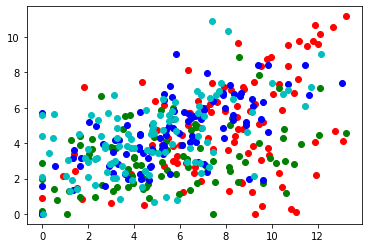

In [19]:
plt.scatter(x_0[:, 0], x_0[:, 1], c='r')
plt.scatter(x_1[:, 0], x_1[:, 1], c='g')
plt.scatter(x_2[:, 0], x_2[:, 1], c='b')
plt.scatter(x_3[:, 0], x_3[:, 1], c='c')